In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('./dataset/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


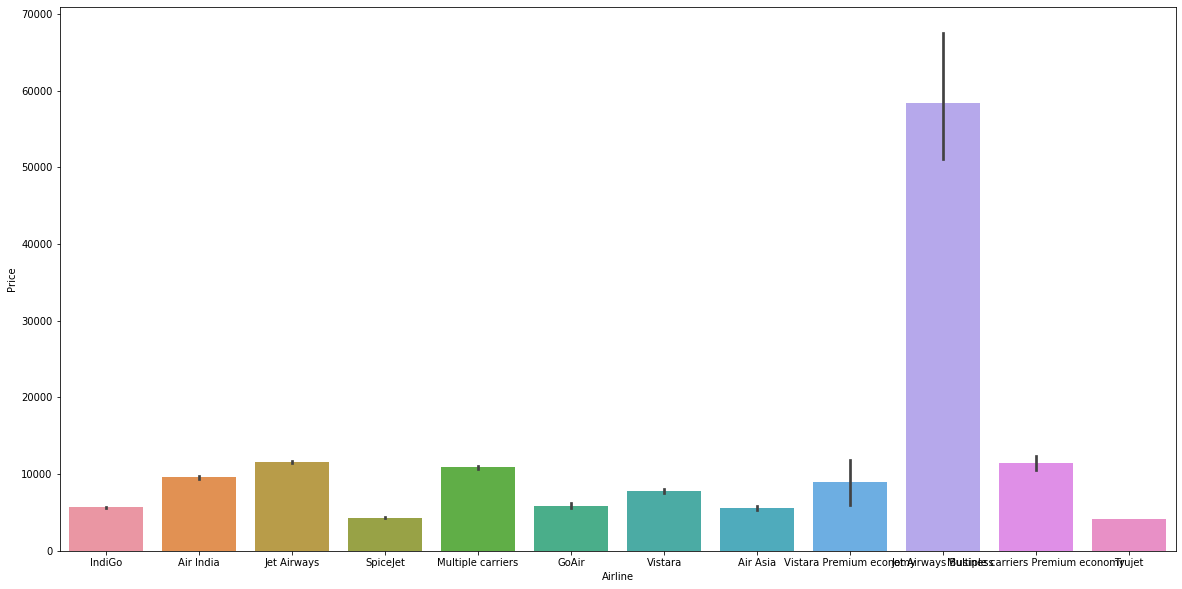

In [4]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.barplot(x='Airline',y='Price',data=df)

In [5]:
df[df['Airline']=='Jet Airways Business']['Price']

657      52229
2924     79512
5372     62427
7351     46490
9715     52285
10364    57209
Name: Price, dtype: int64

## Data Pre-processing on Training Data

**check null values in dataset**

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# as we have few null values in dataframe we will directly delete the NULL record
df.dropna(inplace=True,axis=0)

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Handling Categorical Data**

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order (Airlines or Source\Destination attribute) --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order (TotalStops Attribute) --> **LabelEncoder** is used in this case

In [10]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [12]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
airline = pd.get_dummies(df['Airline'],drop_first=True)
source = pd.get_dummies(df['Source'],drop_first=True)
destination = pd.get_dummies(df['Destination'],drop_first=True)

In [14]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**

**.dt.month method will extract only month of that date**

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y', errors='ignore').dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int64

In [17]:
# we are skiiping Year as year is 2019 for whole dataset, so conversion is not required for year
Date_of_Journey_day = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y', errors='ignore').dt.day
Date_of_Journey_month = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y', errors='ignore').dt.month

In [18]:
# Extracting Hours
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Minutes
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
Date_of_Journey_day.head()

0    24
1     1
2     9
3    12
4     1
Name: Date_of_Journey, dtype: int64

In [20]:
Date_of_Journey_month.head()

0    3
1    5
2    6
3    5
4    3
Name: Date_of_Journey, dtype: int64

In [21]:
pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.hour

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10682, dtype: int64

In [22]:
# convert hour and minutes in separate columns
Dep_Time_hour = pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.hour
Dep_Time_minute = pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.minute

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35


**as we can see that duration is not in fixed format so we have to apply some other data processing logic to convert it**

In [24]:
df['Duration'][0]

'2h 50m'

In [25]:
print(df['Duration'][0].split(' '))
print('Len is :',len(df['Duration'][0].split(' ')))

['2h', '50m']
Len is : 2


In [26]:
lst_duration = []
for dur in df['Duration']:
    if len(dur.split(' ')) == 2:
        lst = dur.split(' ')
        
        lst_duration.append([lst[0].split('h')[0],lst[1].split('m')[0]])
    else:
        if 'm' in dur:
            lst_duration.append([0,dur.split('m')[0]])
        else:
            lst_duration.append([dur.split('h')[0],0])

In [27]:
lst_duration[:5]

[['2', '50'], ['7', '25'], ['19', 0], ['5', '25'], ['4', '45']]

**finally we will convert stops**

In [28]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
df.Total_Stops.value_counts().index

Index(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], dtype='object')

In [30]:
dict_total_stops = {'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [31]:
dict_total_stops

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [32]:
total_stops = df['Total_Stops'].apply(lambda val:dict_total_stops[val])

In [33]:
total_stops.head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

In [34]:
total_stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

**We have converted, alsmost everything**

Now we will drop columns which are not required and append\concatnate the new columns

def data_preprocessing(df_copy):
    # convert columns to hold dummy values
    airline1 = pd.get_dummies(df_copy['Airline'],drop_first=True)
    source1 = pd.get_dummies(df_copy['Source'],drop_first=True)
    destination1 = pd.get_dummies(df_copy['Destination'],drop_first=True)

    # convert hour and minutes in separate columns
    Dep_Time_hour1 = pd.to_datetime(df_copy['Dep_Time'],format='%H:%M').dt.hour
    Dep_Time_minute1 = pd.to_datetime(df_copy['Dep_Time'],format='%H:%M').dt.minute

    # covert duration
    lst_duration1 = []
    for dur in df_copy['Duration']:
        if len(dur.split(' ')) == 2:
            lst1 = dur.split(' ')

            lst_duration1.append([lst1[0].split('h')[0],lst1[1].split('m')[0]])
        else:
            if 'm' in dur:
                lst_duration1.append([0,dur.split('m')[0]])
            else:
                lst_duration1.append([dur.split('h')[0],0])

    # convert total stops
    dict_total_stops1 = {'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
    total_stops1 = df_copy['Total_Stops'].apply(lambda val:dict_total_stops1[val])
    
    df_copy.drop(['Airline','Source','Destination','Dep_Time','Duration','Total_Stops'],axis=1,inplace=True)
    df_copy = pd.concat(df_copy,airline1,source1,destination1)
    
    return df_copy

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35


In [36]:
df.drop(['Airline','Date_of_Journey','Source','Destination','Dep_Time','Duration','Total_Stops'],axis=1,inplace=True)

In [37]:
# we will drop Arrival_Time, Additional_Info and Route as its not giving more data insight
df.drop(['Arrival_Time','Additional_Info','Route'],axis=1,inplace=True)

In [38]:
df.head()

,Price,Arrival_hour,Arrival_min
0,3897,1,10
1,7662,13,15
2,13882,4,25
3,6218,23,30
4,13302,21,35


In [39]:
train_data = pd.concat([df,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,airline,source,destination,total_stops],axis=1)

In [40]:
train_data.head()

,Price,Arrival_hour,Arrival_min,Date_of_Journey,Date_of_Journey,Dep_Time,Dep_Time,Air India,GoAir,IndiGo,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops
0,3897,1,10,24,3,22,20,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,7662,13,15,1,5,5,50,1,0,0,...,0,0,1,0,0,0,0,0,0,2
2,13882,4,25,9,6,9,25,0,0,0,...,0,1,0,0,1,0,0,0,0,2
3,6218,23,30,12,5,18,5,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,13302,21,35,1,3,16,50,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [41]:
df_duration = pd.DataFrame(lst_duration,columns=['Duration_Hour','Duration_Minutes'])

In [42]:
train_data = pd.concat([train_data,df_duration],axis=1)

In [43]:
train_data.columns

Index(['Price', 'Arrival_hour', 'Arrival_min', 'Date_of_Journey',
       'Date_of_Journey', 'Dep_Time', 'Dep_Time', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Total_Stops',
       'Duration_Hour', 'Duration_Minutes'],
      dtype='object')

In [44]:
train_data.head()

,Price,Arrival_hour,Arrival_min,Date_of_Journey,Date_of_Journey,Dep_Time,Dep_Time,Air India,GoAir,IndiGo,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Duration_Hour,Duration_Minutes
0,3897.0,1.0,10.0,24.0,3.0,22.0,20.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,50
1,7662.0,13.0,15.0,1.0,5.0,5.0,50.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7,25
2,13882.0,4.0,25.0,9.0,6.0,9.0,25.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,19,0
3,6218.0,23.0,30.0,12.0,5.0,18.0,5.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,25
4,13302.0,21.0,35.0,1.0,3.0,16.0,50.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4,45


In [45]:
pd.set_option('display.max_columns',None)

In [46]:
# we can see that after setting "display.max_columns" option, all columns are visible and no ellipses (...)
train_data.head()

,Price,Arrival_hour,Arrival_min,Date_of_Journey,Date_of_Journey,Dep_Time,Dep_Time,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Duration_Hour,Duration_Minutes
0,3897.0,1.0,10.0,24.0,3.0,22.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,50
1,7662.0,13.0,15.0,1.0,5.0,5.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7,25
2,13882.0,4.0,25.0,9.0,6.0,9.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,19,0
3,6218.0,23.0,30.0,12.0,5.0,18.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,25
4,13302.0,21.0,35.0,1.0,3.0,16.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4,45


#### Now we will do data-preprocessing on Test Data

In [47]:
df_test = pd.read_excel('./dataset/Test_set.xlsx')

In [48]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
df_test.shape

(2671, 10)

In [50]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [51]:
test_airline = pd.get_dummies(df_test['Airline'],drop_first=True)
test_source = pd.get_dummies(df_test['Source'],drop_first=True)
test_destination = pd.get_dummies(df_test['Destination'],drop_first=True)

In [52]:
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [53]:
df_test = pd.concat([df_test,test_airline,test_source,test_destination],axis=1)

In [54]:
df_test.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
df_test.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [56]:
df_test['Date_of_Journey_month']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.month
df_test['Date_of_Journey_day']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [57]:
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [58]:
df_test['Dep_Time_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_Time_minute']=pd.to_datetime(df_test['Dep_Time']).dt.minute

In [59]:
df_test.drop('Dep_Time',axis=1,inplace=True)

In [60]:
df_test['Arrival_Time_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Time_minute']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [61]:
df_test.drop('Arrival_Time',axis=1,inplace=True)

In [62]:
# Convert Duration

lst_duration1 = []
for dur in df_test['Duration']:
    if len(dur.split(' ')) == 2:
        lst1 = dur.split(' ')

        lst_duration1.append([lst1[0].split('h')[0],lst1[1].split('m')[0]])
    else:
        if 'm' in dur:
            lst_duration1.append([0,dur.split('m')[0]])
        else:
            lst_duration1.append([dur.split('h')[0],0])

df_new = pd.DataFrame(lst_duration1,columns=['Duration_Hour','Duration_Minute'])            

df_test = pd.concat([df_test,df_new],axis=1)

df_test.drop('Duration',axis=1,inplace=True)

# convert total stops
dict_total_stops1 = {'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
total_stops1 = df_test['Total_Stops'].apply(lambda val:dict_total_stops1[val])

df_test['Total_Stops']=total_stops1

In [63]:
df_test.head(2)

,Route,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hour,Duration_Minute
0,DEL → BOM → COK,1,No info,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,17,30,4,25,10,55
1,CCU → MAA → BLR,1,No info,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,6,20,10,20,4,0


In [64]:
df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [65]:
df_test.head(2)

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hour,Duration_Minute
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,17,30,4,25,10,55
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,6,20,10,20,4,0


In [66]:
# no null value
df_test.isnull().sum()

Total_Stops                          0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Date_of_Journey_month                0
Date_of_Journey_day                  0
Dep_Time_hour                        0
Dep_Time_minute                      0
Arrival_Time_hour                    0
Arrival_Time_minute      

In [67]:
train_data.dropna(inplace=True)
df_test.dropna(inplace=True)

# we have converted (processed) test data also.

In [68]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [69]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

y = y.apply(lambda ser:int(ser))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
extr = ExtraTreesRegressor()

In [71]:
extr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [72]:
extr.feature_importances_

array([3.10708922e-02, 2.08401724e-02, 1.39282668e-01, 5.39785170e-02,
       2.87843626e-02, 2.35558813e-02, 1.26735275e-02, 1.48465491e-03,
       1.73184526e-02, 1.36550593e-01, 6.63532274e-02, 2.09890433e-02,
       9.10994723e-04, 3.48757899e-03, 1.49149553e-04, 5.86755370e-03,
       1.14292929e-04, 5.87203893e-04, 1.05933550e-02, 3.73519697e-03,
       6.57075469e-03, 1.09290881e-02, 1.36723545e-02, 7.58066695e-03,
       5.04098331e-04, 2.50005921e-02, 2.77607431e-01, 6.13664782e-02,
       1.84412180e-02])

In [73]:
imp_feat_ser = pd.Series(data=extr.feature_importances_,index=X.columns)

In [74]:
imp_feat_ser.sort_values(ascending=False).head()

Total_Stops             0.277607
Date_of_Journey         0.139283
Jet Airways             0.136551
Jet Airways Business    0.066353
Duration_Hour           0.061366
dtype: float64

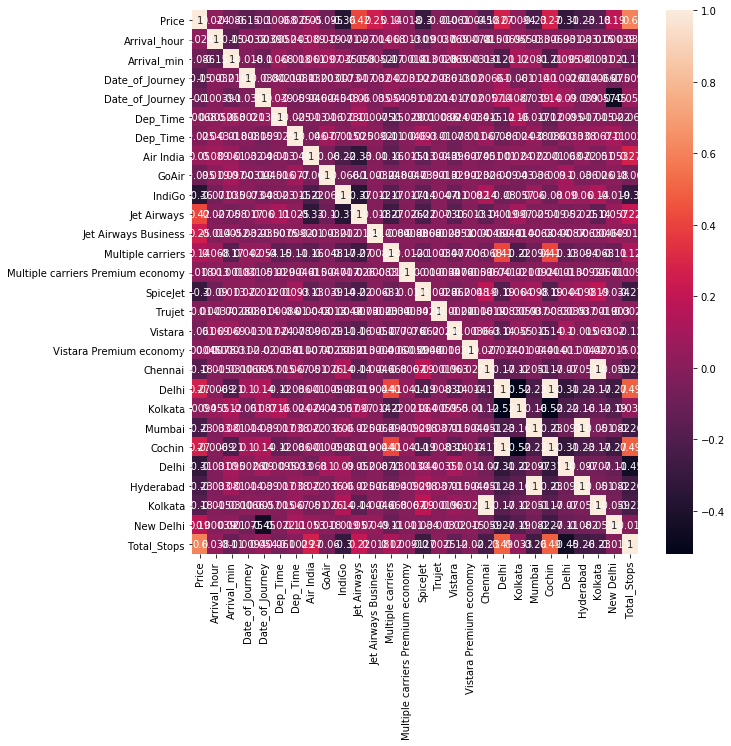

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
X_test.columns

#### Find loss

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
mean_squared_error(y_test,predictions)

In [ ]:
import math
math.sqrt(mean_squared_error(y_test,predictions))

Check how the data is scatterred

In [ ]:
sns.scatterplot(x=y_test,y=predictions)

In [ ]:
import pickle

file_out = open('FlightFare.pkl','wb')
pickle.dump(rfc,file_out)
file_out.close()